# Forest Fires Data Set
data set here : https://archive.ics.uci.edu/ml/datasets/Forest+Fires

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# WIND

In [2]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv" , usecols = [7,8,9,10])
df

,ISI,temp,RH,wind
0,5.1,8.2,51,6.7
1,6.7,18.0,33,0.9
2,6.7,14.6,33,1.3
3,9.0,8.3,97,4.0
4,9.6,11.4,99,1.8
...,...,...,...,...
512,1.9,27.8,32,2.7
513,1.9,21.9,71,5.8
514,1.9,21.2,70,6.7
515,11.3,25.6,42,4.0


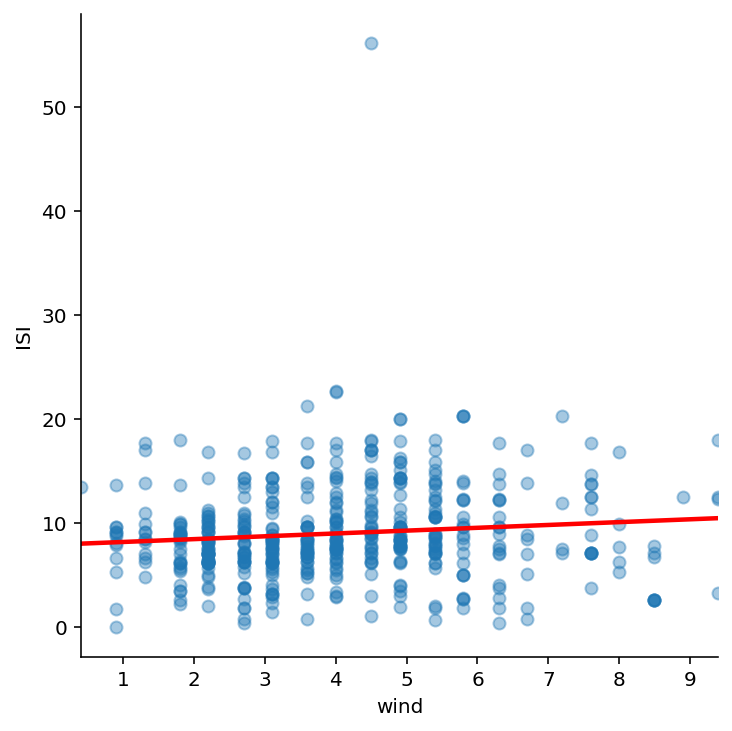

In [4]:
#กราฟแสดงความสัมพันธ์ระหว่าง ISI กับ wind
sns.lmplot(x='wind', y='ISI', data=df, ci=None, scatter_kws={'alpha':0.4}, line_kws={'color':'Red'})

# Linear regression Model-Wind

In [5]:
#linear Regrssion
x = df[['wind']]
y = df['ISI']
x_train , x_test , y_train , y_test = train_test_split ( x, y, train_size = 0.8, random_state = 0)
model_wind = LinearRegression()
model_wind

LinearRegression()

In [6]:
#train
model_wind.fit(x_train, y_train)

LinearRegression()

In [8]:
model_wind.score(x_train , y_train )

0.021751185560820452

In [9]:
print('coefficients: ', model_wind.coef_)
print('Intercept: ', model_wind.intercept_)

coefficients:  [0.38069515]
Intercept:  7.541140617062858


In [10]:
#test
ISI_wind = model_wind.predict(x_test)
ISI_wind

array([ 9.74917248,  8.22639188,  9.25426878,  9.25426878,  9.06392121,
        9.59689442, 10.77704938,  8.03604431,  8.56901752,  8.22639188,
        7.69341868, 10.77704938,  8.56901752,  9.06392121,  9.06392121,
        8.56901752,  8.91164315,  9.25426878,  8.72129558,  9.06392121,
        9.59689442,  9.06392121, 11.11967501,  8.72129558,  9.06392121,
        8.72129558,  9.06392121,  9.40654684,  9.40654684,  8.56901752,
        8.91164315,  9.06392121,  8.91164315,  9.40654684,  8.22639188,
        9.74917248,  8.56901752,  8.03604431,  9.06392121,  9.59689442,
        9.74917248,  9.06392121,  9.59689442,  8.72129558,  8.37866994,
        9.74917248,  8.91164315,  8.56901752,  8.91164315,  8.91164315,
        9.59689442,  8.37866994,  9.40654684, 10.28214568,  9.40654684,
        7.88376625,  8.72129558, 10.09179811,  9.93952005,  8.72129558,
        9.74917248,  9.59689442,  9.25426878,  9.40654684,  9.25426878,
        8.22639188,  8.72129558,  9.06392121,  8.72129558, 10.43

In [11]:
test = pd.concat([x_test , y_test ], axis='columns')
test

,wind,ISI
213,5.8,5.0
435,1.8,5.6
343,4.5,7.5
230,4.5,9.2
171,4.0,6.6
...,...,...
154,2.7,8.1
49,5.8,5.0
100,5.4,10.6
153,4.9,15.9


In [12]:
wind_test_cp=pd.concat([test.reset_index(), pd.Series(ISI_wind, name='predicted')] , axis='columns')
wind_test_cp.head()

,index,wind,ISI,predicted
0,213,5.8,5.0,9.749172
1,435,1.8,5.6,8.226392
2,343,4.5,7.5,9.254269
3,230,4.5,9.2,9.254269
4,171,4.0,6.6,9.063921


In [13]:
#วัดประสิทธิภาพของโมเดล
print('MAE = ', metrics.mean_absolute_error(y_test, ISI_wind))
print('Mean squared error (MSE) = ', metrics.mean_squared_error(y_test, ISI_wind))
print('RMSE = ', np.sqrt(metrics.mean_squared_error(y_test, ISI_wind)))
#ถ้าค่าเป็น 1 แสดงว่าแม่นยำที่สุด
print("Coefficient of determination (R2-Score) = ",metrics.r2_score(y_test, ISI_wind))

MAE =  3.265137858700923
Mean squared error (MSE) =  17.343845368633474
RMSE =  4.16459426218611
Coefficient of determination (R2-Score) =  -0.05741133952654809


In [14]:
#แสดงค่าความแม่นยำด้วย R-Square หากมีค่าเป็น 1 แสดงว่าแม่นยำที่สุด
print("Score = ",metrics.r2_score(y_test, ISI_wind))

Score =  -0.05741133952654809


In [15]:
print('Coefficient:', model_wind.coef_)
print('Intercept:', model_wind.intercept_)
print('Mean squared error (MSE): %.2f' % metrics.mean_squared_error(y_test, ISI_wind))
print('Coefficient of determination (R^2): %.2f' % metrics.r2_score(y_test, ISI_wind))

Coefficient: [0.38069515]
Intercept: 7.541140617062858
Mean squared error (MSE): 17.34
Coefficient of determination (R^2): -0.06


# RH

In [17]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv", usecols=[7,9])
df.head(10)

,ISI,RH
0,5.1,51
1,6.7,33
2,6.7,33
3,9.0,97
4,9.6,99
5,14.7,29
6,8.5,27
7,10.7,86
8,7.0,63
9,7.1,40


In [18]:
df['RH'].value_counts()

27     33
39     24
35     20
43     17
42     17
       ..
94      1
96      1
97      1
99      1
100     1
Name: RH, Length: 75, dtype: int64

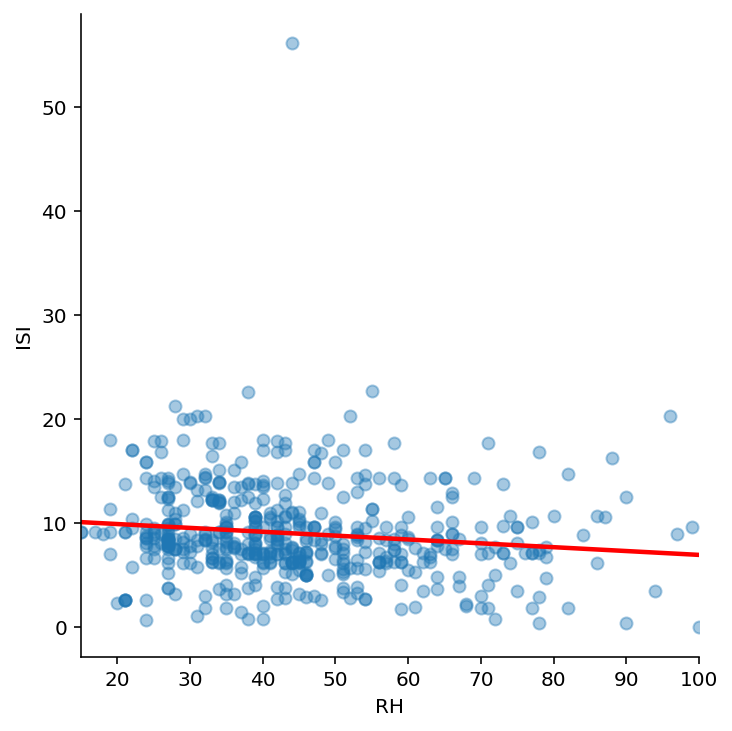

In [19]:
sns.lmplot(x="RH", y="ISI", data=df, ci=None, 
           scatter_kws={'alpha':0.4}, 
           line_kws={'color':'red'})

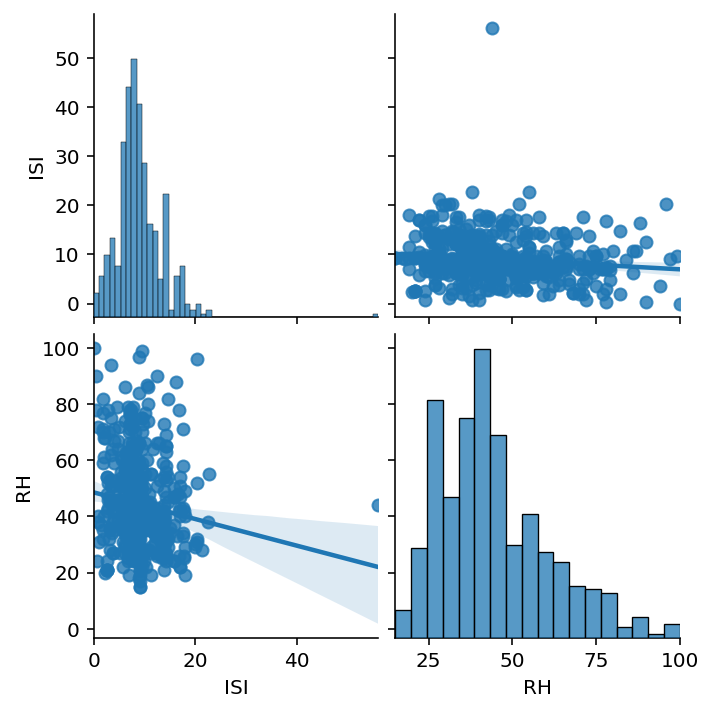

In [20]:
sns.pairplot(df, kind='reg');

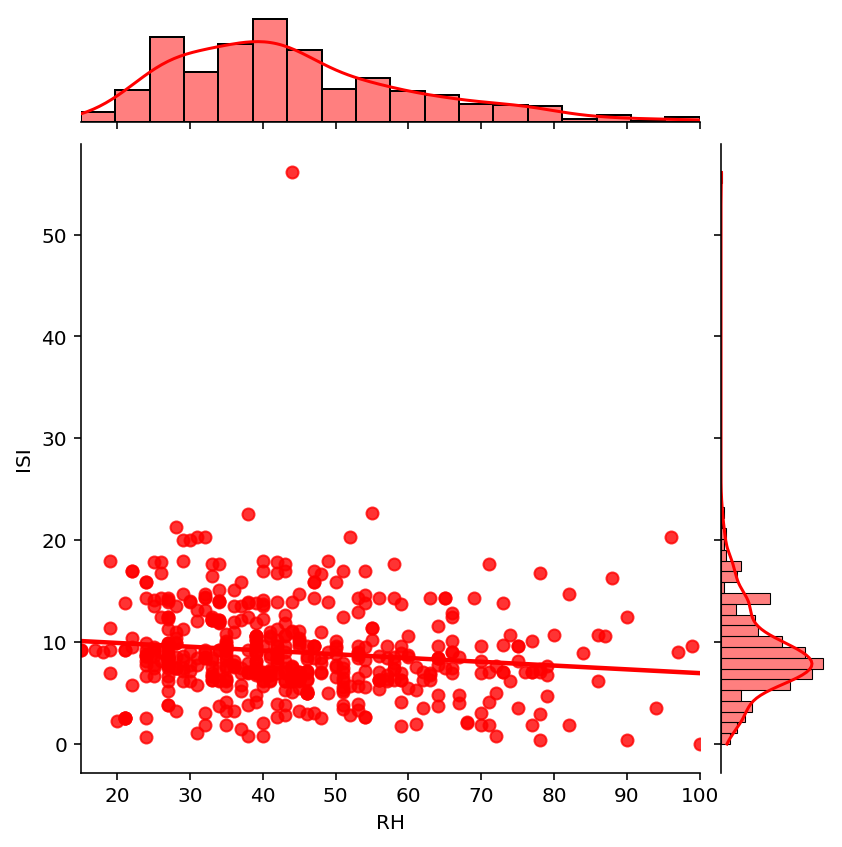

In [21]:
sns.jointplot(x='RH', y='ISI', data=df, kind='reg', ci=None,
            color='red');

# Linear Regression Model-RH

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
modelRH = LinearRegression()
modelRH

LinearRegression()

In [24]:
x = df[["RH"]]
y = df["ISI"]

In [25]:
modelRH.fit(x, y)

LinearRegression()

In [26]:
modelRH.score(x, y)

0.01756080226610479

In [27]:
modelRH.intercept_

10.661582681337888

In [28]:
modelRH.coef_

array([-0.03702836])

In [29]:
modelRH.predict([[111]])

array([6.55143527])

In [30]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.8,random_state=0)

In [31]:
isi_pred = modelRH.predict(x_train)
isi_pred

array([ 9.29153354,  9.88398722,  9.40261861,  9.06936341,  8.69907986,
        8.77313657,  9.47667532,  9.36559025,  9.21747683,  8.81016493,
        9.3285619 ,  9.10639177,  8.5879948 ,  9.29153354,  8.9953067 ,
        8.5879948 ,  9.06936341,  8.03256947,  8.29176796,  7.95851276,
        8.55096644,  9.03233506,  9.77290216,  8.77313657,  8.9953067 ,
        9.77290216,  9.3285619 ,  9.21747683,  9.21747683,  8.81016493,
        8.5879948 ,  9.62478874,  9.03233506,  8.66205151,  9.18044848,
        8.29176796,  8.66205151,  8.73610822,  9.40261861,  9.43964696,
        8.55096644,  9.43964696,  9.66181709,  9.40261861,  9.10639177,
        9.3285619 ,  8.29176796,  8.95827835,  8.69907986,  9.77290216,
        8.9953067 ,  7.81039934,  7.99554112,  8.5879948 ,  9.58776038,
        8.66205151,  8.14365454,  7.77337099,  9.29153354,  9.06936341,
        8.95827835,  9.69884545,  8.40285302,  9.47667532,  8.88422164,
        9.47667532,  9.84695887,  9.62478874,  9.18044848,  9.66

In [32]:
isi_pred_test = modelRH.predict(x_test)
isi_pred_test

array([ 8.95827835,  8.77313657,  8.77313657,  9.88398722,  8.81016493,
        9.03233506,  9.51370367,  8.51393809,  8.32879631,  8.88422164,
        9.18044848,  9.88398722,  9.36559025,  9.55073203,  7.77337099,
        8.21771125,  9.21747683,  9.58776038,  9.36559025,  8.9953067 ,
        8.43988138,  9.66181709,  8.69907986,  9.06936341,  9.06936341,
        9.7358738 ,  9.77290216,  8.2547396 ,  9.66181709,  9.25450519,
        8.06959783,  9.03233506,  8.62502315,  9.55073203,  9.58776038,
        9.14342012,  9.25450519,  8.92124999,  9.66181709,  9.66181709,
        8.03256947,  9.18044848,  8.69907986,  8.9953067 ,  9.66181709,
        9.40261861,  9.66181709,  9.36559025,  8.9953067 ,  9.06936341,
        8.21771125,  9.14342012,  8.95827835,  9.40261861,  8.21771125,
        9.43964696,  7.73634263,  7.99554112,  8.69907986,  8.47690973,
        8.47690973,  9.47667532,  9.40261861,  9.21747683,  8.55096644,
        8.95827835,  9.43964696,  9.3285619 ,  9.06936341,  8.03

In [33]:
TEST = pd.concat([ x_test , y_test ], axis='columns')
TEST

,RH,ISI
213,46,5.0
435,51,5.6
343,51,7.5
230,21,9.2
171,50,6.6
...,...,...
305,52,5.7
48,35,4.1
341,51,6.5
373,42,13.9


In [34]:
da=pd.concat([TEST.reset_index(), pd.Series(isi_pred_test, name='predicted')] , axis='columns')
da

,index,RH,ISI,predicted
0,213,46,5.0,8.958278
1,435,51,5.6,8.773137
2,343,51,7.5,8.773137
3,230,21,9.2,9.883987
4,171,50,6.6,8.810165
...,...,...,...,...
409,305,52,5.7,8.736108
410,48,35,4.1,9.365590
411,341,51,6.5,8.773137
412,373,42,13.9,9.106392


# วัดประสิทธิภาพโมเดล

In [35]:
print('MAE = ', metrics.mean_absolute_error(y_test, isi_pred_test))
print('MSE = ', metrics.mean_squared_error(y_test, isi_pred_test))
print('RMSE = ', np.sqrt(metrics.mean_squared_error(y_test, isi_pred_test)))

MAE =  3.2846578134502273
MSE =  22.261979073263007
RMSE =  4.718260174392994


In [36]:
print("Score = ",metrics.r2_score(y_test, isi_pred_test))

Score =  0.015474864467872718


# TEMP

In [37]:
df = pd.read_csv( 'forestfires.csv' , usecols = [7,8,4,9,10] )
df.head()

,FFMC,ISI,temp,RH,wind
0,86.2,5.1,8.2,51,6.7
1,90.6,6.7,18.0,33,0.9
2,90.6,6.7,14.6,33,1.3
3,91.7,9.0,8.3,97,4.0
4,89.3,9.6,11.4,99,1.8


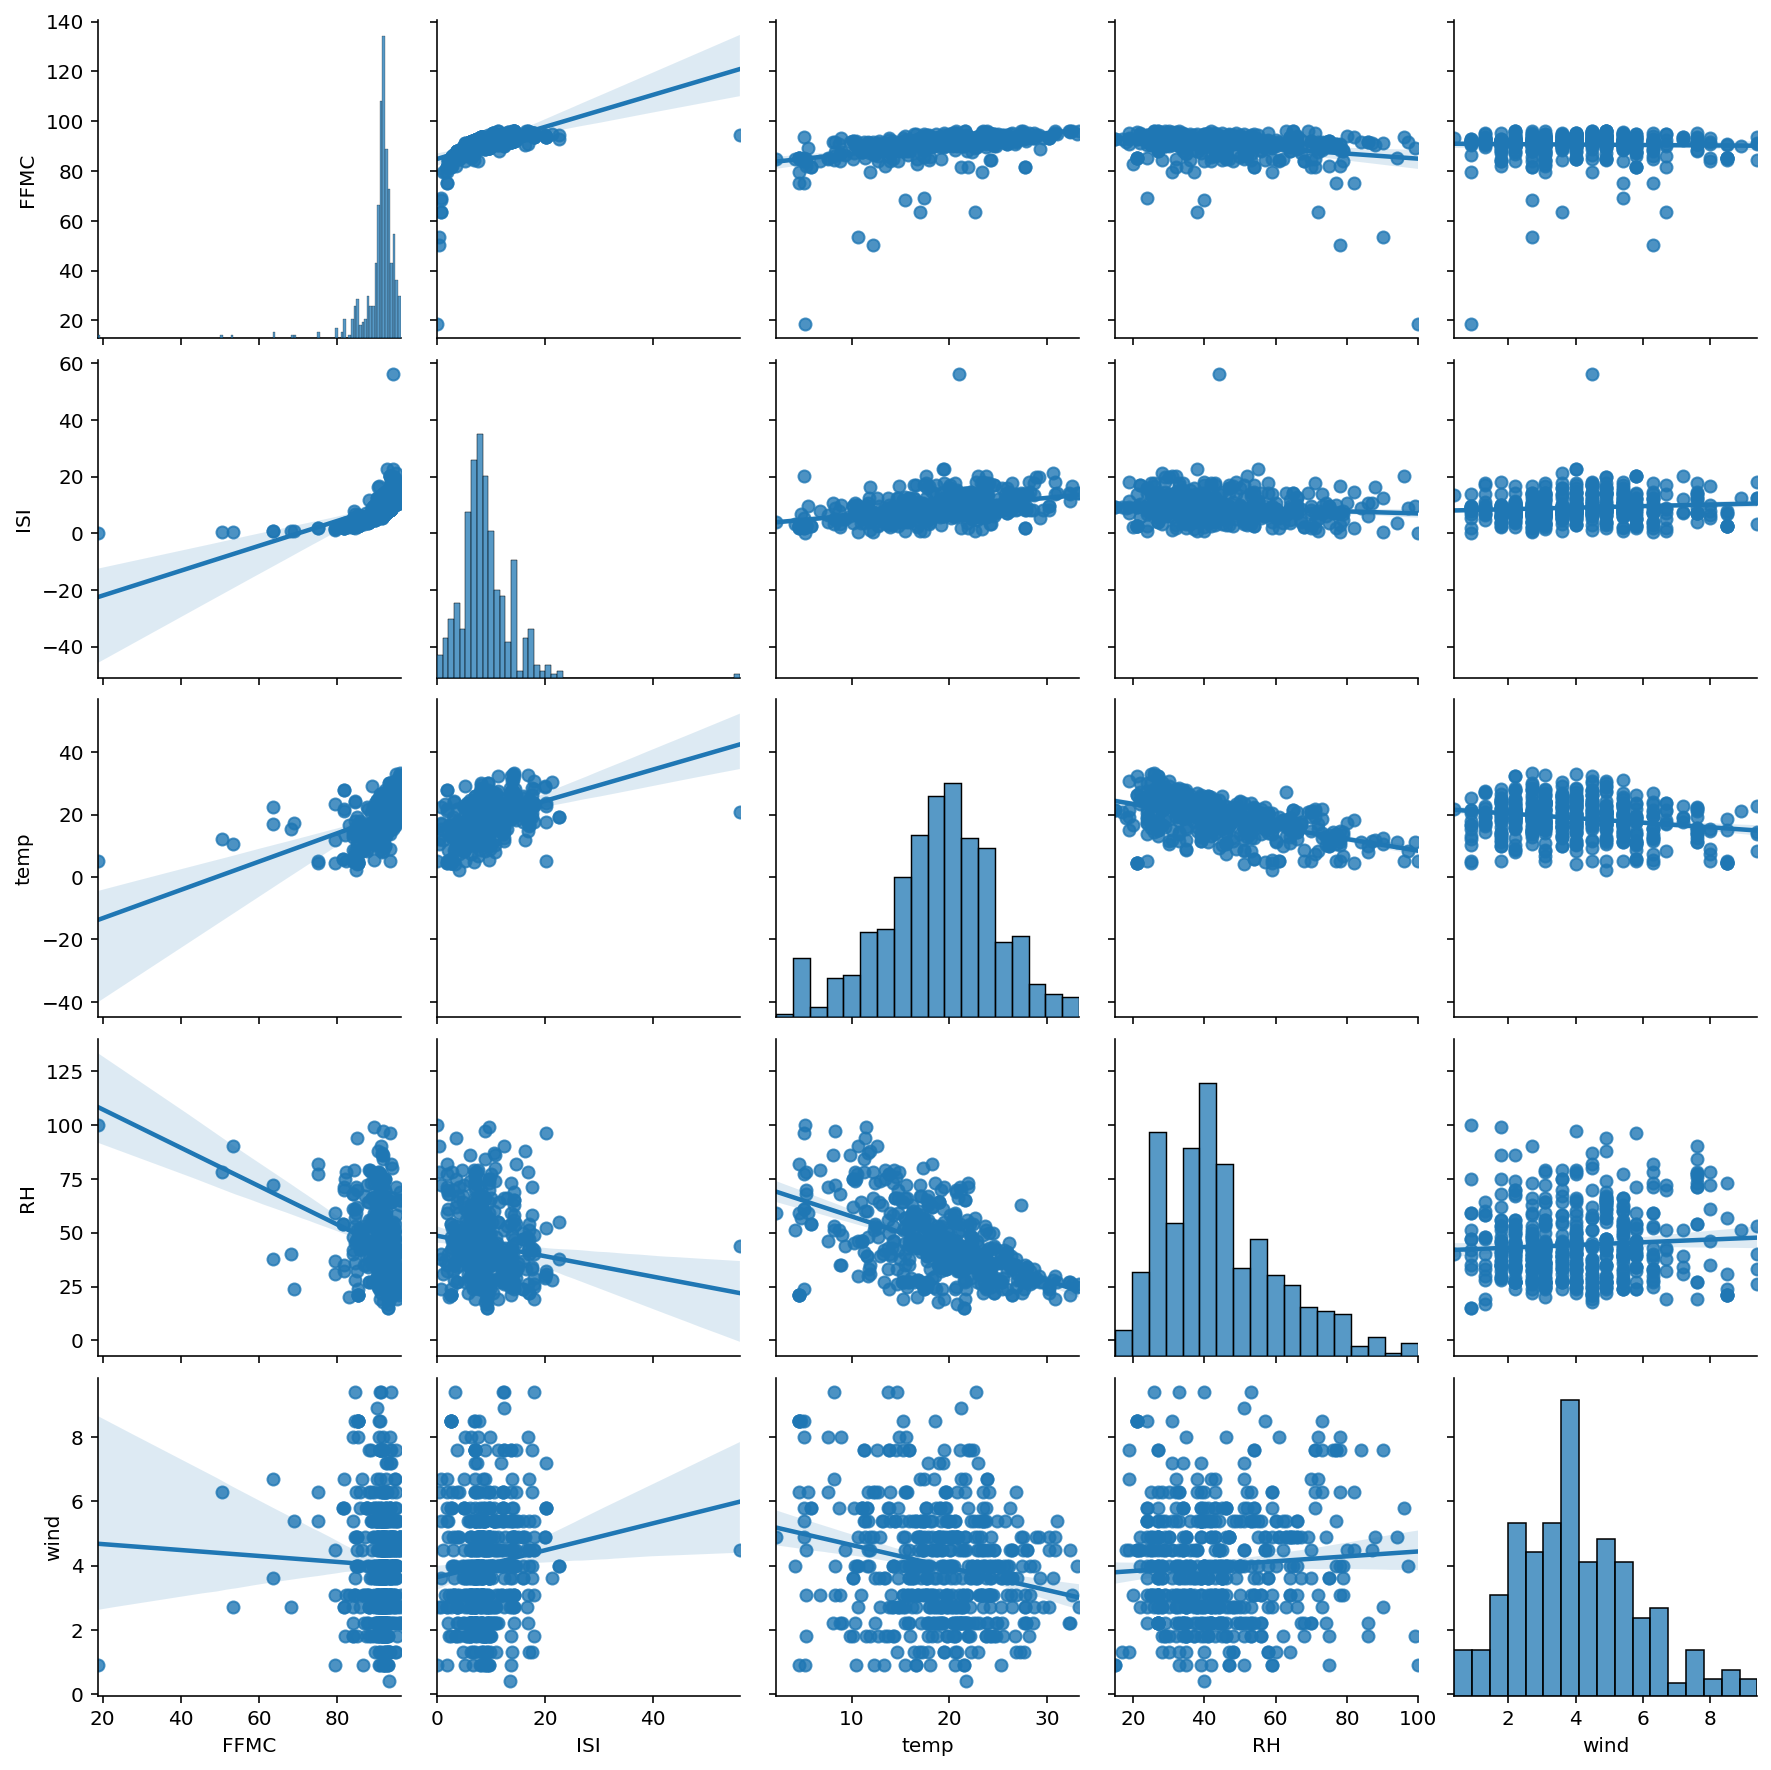

In [38]:
#แสดงความสัมพันธ์ทุกตัวแปร
sns.pairplot(df, kind='reg')

# Temp with ISI

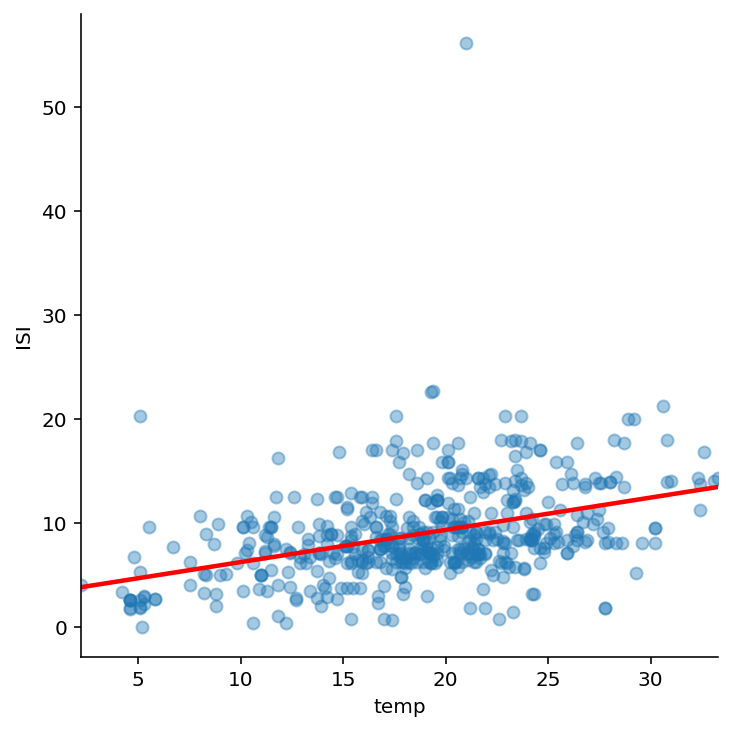

In [39]:
#กราฟแสดงความสัมพันธ์ระหว่าง ISI กับ temp
sns.lmplot(x='temp', y='ISI', data=df, ci=None, scatter_kws={'alpha':0.4}, line_kws={'color':'Red'})

# Linear regression Model-Temp

In [40]:
#linear Regrssion
x = df[['temp']]
y = df['ISI']
x_train , x_test , y_train , y_test = train_test_split ( x, y, train_size = 0.8, random_state = 0)
model_temp = LinearRegression()
model_temp

LinearRegression()

In [41]:
#train
model_temp.fit(x_train, y_train)

LinearRegression()

In [42]:
model_temp.score( x_train , y_train )

0.15158426487690668

In [43]:
print('coefficients: ', model_temp.coef_)
print('Intercept: ', model_temp.intercept_)

coefficients:  [0.31382287]
Intercept:  3.1381799304959213


In [44]:
#test
ISI_temp = model_temp.predict(x_test)
ISI_temp

array([ 6.59023147, 10.60716416,  8.12796352, 11.42310362,  8.59869782,
       10.32472358,  7.90828751,  9.60293099,  8.22211038,  7.12373034,
        9.94813614,  4.58176512, 11.42310362,  6.46470232,  6.37055546,
        7.75137608,  9.19496126, 11.76830877,  5.89982116, 11.32895676,
        6.68437833, 10.5130173 ,  5.71152744,  8.4104041 , 10.01090072,
        8.91252068, 11.26619219,  9.91675386, 10.7640756 ,  9.13219669,
        7.75137608, 10.85822246,  8.12796352, 12.80392423, 11.98798478,
        9.28910812,  7.81414065,  8.28487495, 11.01513389, 12.86668881,
       10.01090072,  9.44601956,  8.50455096,  9.50878413, 10.95236932,
        9.1008144 , 12.33318993,  9.06943212,  8.91252068,  9.60293099,
        7.65722922,  8.50455096,  6.46470232,  9.06943212,  6.96681891,
        8.78699154,  5.24079314,  8.47316867,  7.97105208,  8.22211038,
        7.75137608, 10.60716416, 11.92522021, 10.32472358,  7.97105208,
        8.84975611,  9.85398928, 10.92098703,  8.06519894,  9.22

In [45]:
ISI_test = pd.concat([ x_test , y_test ], axis='columns')
ISI_test_cp=pd.concat([ISI_test.reset_index(), pd.Series(ISI_temp, name='predicted')] , axis='columns')
ISI_test_cp.head()

,index,temp,ISI,predicted
0,213,11.0,5.0,6.590231
1,435,23.8,5.6,10.607164
2,343,15.9,7.5,8.127964
3,230,26.4,9.2,11.423104
4,171,17.4,6.6,8.598698


In [46]:
#วัดประสิทธิภาพของโมเดล
print('MAE = ', metrics.mean_absolute_error(y_test, ISI_temp))
print('Mean squared error (MSE) = ', metrics.mean_squared_error(y_test, ISI_temp))
print('RMSE = ', np.sqrt(metrics.mean_squared_error(y_test, ISI_temp)))
#ถ้าค่าเป็น 1 แสดงว่าแม่นยำที่สุด
print("Coefficient of determination (R2-Score) = ",metrics.r2_score(y_test, ISI_temp))

MAE =  2.8759661414391666
Mean squared error (MSE) =  13.555860498411318
RMSE =  3.681828417839609
Coefficient of determination (R2-Score) =  0.17353272567895806


# FFMC

In [47]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv" , usecols = [4,7])
df

,FFMC,ISI
0,86.2,5.1
1,90.6,6.7
2,90.6,6.7
3,91.7,9.0
4,89.3,9.6
...,...,...
512,81.6,1.9
513,81.6,1.9
514,81.6,1.9
515,94.4,11.3


# FFMC with ISI

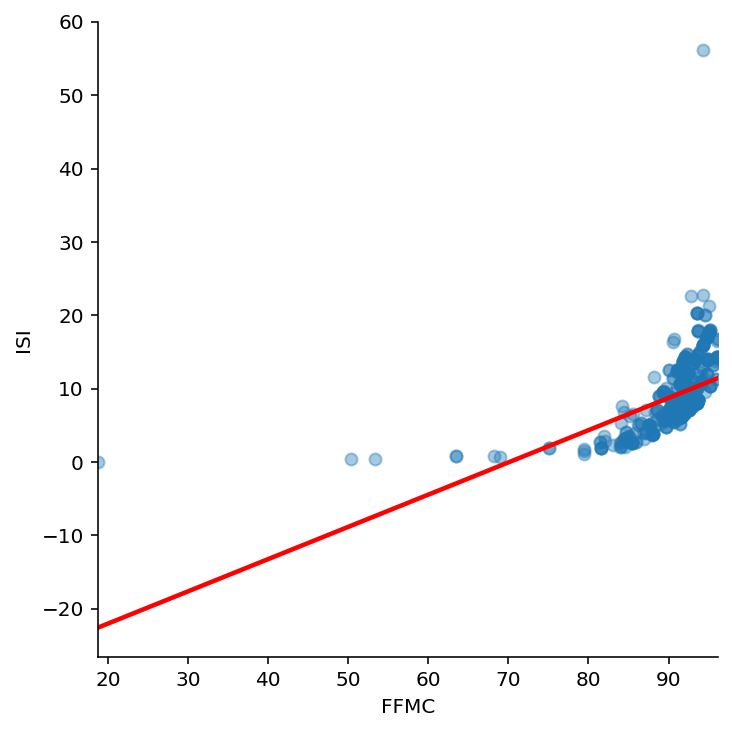

In [48]:
#กราฟแสดงความสัมพันธ์ระหว่าง ISI กับ FFMC
sns.lmplot(x='FFMC',y='ISI',data=df ,ci=None,
          scatter_kws={'alpha':0.4},
          line_kws={'color':'red'})

# Linear regression Model-FFMC

In [49]:
#linear Regrssion
x = df[['FFMC']]
y = df['ISI']
x_train , x_test , y_train , y_test = train_test_split ( x, y, train_size = 0.8, random_state = 0)
model_FFMC = LinearRegression()
model_FFMC

LinearRegression()

In [50]:
#train
model_FFMC.fit(x_train, y_train)

LinearRegression()

In [51]:
model_FFMC.score( x_train , y_train )

0.24947098336446738

In [52]:
print('coefficients: ', model_FFMC.coef_)
print('Intercept: ', model_FFMC.intercept_)

coefficients:  [0.40886053]
Intercept:  -28.001864744408266


In [53]:
ISI_FFMC = model_FFMC.predict(x_train)
ISI_FFMC

array([  9.00001291,   8.9182408 ,   9.49064554,   8.50938028,
         9.6950758 ,   9.36798738,   9.94039212,  10.55368291,
         9.20444317,   9.73596186,  10.26748054,   6.83305212,
         9.20444317,  -7.39529421,   7.60988712,   9.44975949,
         9.40887343,   9.16355712,  10.3901387 ,   9.20444317,
         8.95912686,   9.44975949,  10.79899922,   8.55026633,
         7.97786159,   9.24532922,   4.50254712,   8.8364687 ,
        10.55368291,   9.57241765,   7.40545685,  10.06305028,
         6.38330554,  10.75811317,   5.36115422,   9.98127817,
        10.22659449,   9.98127817,   8.87735475,  10.92165738,
         9.53153159,  10.30836659,  10.88077133,   9.6133037 ,
         9.44975949,   9.65418975,  10.14482238,   9.77684791,
         9.77684791,   8.50938028,   9.28621528,   5.32026817,
         6.62862185,   9.73596186,  11.04431554,   9.65418975,
        10.22659449,  10.22659449,   9.77684791,  10.55368291,
         9.77684791,   9.20444317,  10.22659449,   9.98

In [56]:
ISI_FFMC_test = model_FFMC.predict(x_test)
ISI_FFMC_test

array([ 7.81431738,  9.12267107,  9.40887343,  9.98127817,  6.99659633,
       10.14482238,  9.04089896, 10.88077133,  9.08178501,  6.30153343,
       10.06305028,  6.91482422, 10.02216422,  8.8364687 ,  8.9182408 ,
        8.8364687 ,  9.24532922, 11.20785975,  7.52811501, 10.30836659,
        8.79558264,  9.6950758 ,  6.5877358 ,  9.40887343,  9.20444317,
        9.04089896, 10.55368291, 11.28963186,  9.85862001,  9.53153159,
        9.16355712,  9.44975949,  9.81773396, 11.2487458 , 10.92165738,
        9.36798738,  8.01874764, 10.75811317,  9.81773396, 10.79899922,
        5.36115422, 10.75811317,  8.63203843,  9.81773396,  9.77684791,
        9.77684791,  8.34583607,  9.53153159,  9.65418975,  9.65418975,
        8.30495001,  9.28621528,  8.50938028,  9.94039212,  9.40887343,
        9.04089896,  6.42419159, -2.03922131,  9.65418975,  8.87735475,
        8.87735475, 11.04431554, 10.14482238, 10.22659449,  8.8364687 ,
        9.81773396,  8.87735475,  9.44975949,  7.40545685, 10.88

In [57]:
FFMC_test = pd.concat([ x_test , y_test ], axis='columns')
FFMC_test 

,FFMC,ISI
213,87.6,5.0
435,90.8,5.6
343,91.5,7.5
230,92.9,9.2
171,85.6,6.6
...,...,...
154,93.4,8.1
49,87.6,5.0
100,91.4,10.6
153,94.3,15.9


In [58]:
FFMC_test_dt=pd.concat([FFMC_test.reset_index(), pd.Series(ISI_FFMC_test, name='predicted')] , axis='columns')
FFMC_test_dt

,index,FFMC,ISI,predicted
0,213,87.6,5.0,7.814317
1,435,90.8,5.6,9.122671
2,343,91.5,7.5,9.408873
3,230,92.9,9.2,9.981278
4,171,85.6,6.6,6.996596
...,...,...,...,...
99,154,93.4,8.1,10.185708
100,49,87.6,5.0,7.814317
101,100,91.4,10.6,9.367987
102,153,94.3,15.9,10.553683


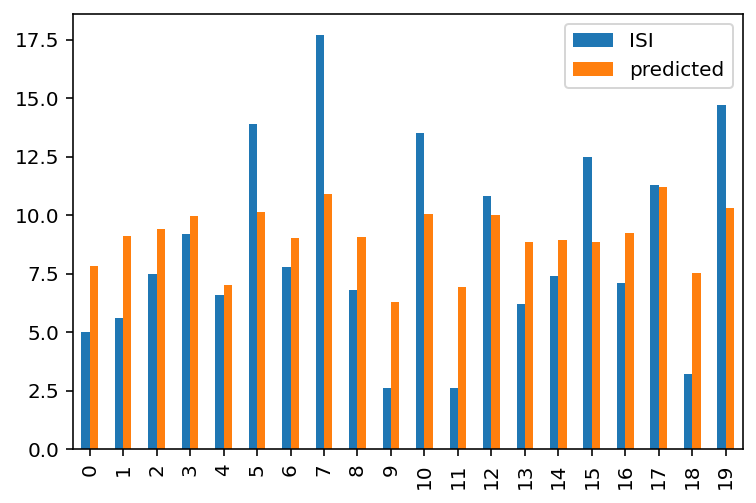

In [59]:
FFMC_test_dt[:20][['ISI','predicted']].plot(kind="bar")
plt.show()

# วัดประสิทธิภาพโมเดล

In [60]:
#วัดประสิทธิภาพของโมเดล
print('MAE = ', metrics.mean_absolute_error(y_test, ISI_FFMC_test))
print('Mean squared error (MSE) = ', metrics.mean_squared_error(y_test, ISI_FFMC_test))
print('RMSE = ', np.sqrt(metrics.mean_squared_error(y_test, ISI_FFMC_test)))
#ถ้าค่าเป็น 1 แสดงว่าแม่นยำที่สุด
print("Coefficient of determination (R2-Score) = ",metrics.r2_score(y_test, ISI_FFMC_test))

MAE =  2.462654801269097
Mean squared error (MSE) =  9.041677647260158
RMSE =  3.00693825132146
Coefficient of determination (R2-Score) =  0.4487512850035339


In [61]:
#แสดงค่าความแม่นยำด้วย R-Square หากมีค่าเป็น 1 แสดงว่าแม่นยำที่สุด
print("Score = ",metrics.r2_score(y_test, ISI_FFMC_test))

Score =  0.4487512850035339


In [62]:
print('Coefficient:', model_FFMC.coef_)
print('Intercept:', model_FFMC.intercept_)
print('Mean squared error (MSE): %.2f' % metrics.mean_squared_error(y_test, ISI_FFMC_test))
print('Coefficient of determination (R^2): %.2f' % metrics.r2_score(y_test, ISI_FFMC_test))

Coefficient: [0.40886053]
Intercept: -28.001864744408266
Mean squared error (MSE): 9.04
Coefficient of determination (R^2): 0.45


# MODEL-5

In [63]:
df = pd.read_csv('forestfires.csv' )
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


# Linear Regression Model-5

In [66]:
df.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

In [67]:
x = df [ [ 'FFMC' ,'RH', 'temp']]
y = df [ 'ISI' ]

In [68]:
x_train_2 , x_test_2 , y_train_2 , y_test_2 = train_test_split ( x, y, train_size = 0.8, random_state = 0)

In [69]:
#training
model2 = LinearRegression()
model2

LinearRegression()

In [70]:
model2.fit(x_train_2, y_train_2)

LinearRegression()

In [71]:
model2.score( x_train_2 , y_train_2 )

0.2967352671488611

In [72]:
model2.intercept_

-27.924295238216473

In [73]:
model2.coef_

array([0.34450692, 0.03603698, 0.22075237])

In [74]:
#test
ISI_pred_test = model2.predict(x_test_2)
ISI_pred_test

array([ 6.34048805, 10.44872544,  8.94593654, 10.66503684,  7.20843729,
       10.85905677,  7.76061412, 11.47595644,  9.16900044,  5.51316543,
       10.38110463,  3.26883323, 11.20400521,  6.53686278,  8.26931332,
        8.73927866,  9.12624812, 12.22968103,  5.21727124, 11.7393041 ,
        7.73804804,  9.99992198,  4.94111948,  8.85631787,  9.8099015 ,
        8.25079985, 11.14508127, 12.29347457, 10.31432664,  9.28721552,
        9.1590321 , 10.64867404,  9.43459137, 13.02865152, 12.14305284,
        9.36789986,  7.08537995, 10.04903766, 10.45647785, 12.58573345,
        7.58057179, 10.6135626 ,  8.62835019, 10.04553204, 10.37787668,
        9.32769652, 10.1434129 ,  9.13495411,  9.48829977,  9.90188103,
        8.22519395,  8.74711755,  6.83784886,  9.44342406,  8.66970742,
        8.45079472,  5.40914954,  0.29934687,  9.11433846,  8.85259907,
        8.52147051, 11.38320541, 11.6245241 , 10.74777327,  8.56947253,
        9.61798904,  9.06355001, 10.4045287 ,  6.92540634, 11.67

In [75]:
test = pd.concat([ x_test_2 , y_test_2 ], axis='columns')
test.head()

,FFMC,RH,temp,ISI
213,87.6,46,11.0,5.0
435,90.8,51,23.8,5.6
343,91.5,51,15.9,7.5
230,92.9,21,26.4,9.2
171,85.6,50,17.4,6.6


In [76]:
dt=pd.concat([test.reset_index(), pd.Series(ISI_pred_test, name='predicted')] , axis='columns')
dt.head()

,index,FFMC,RH,temp,ISI,predicted
0,213,87.6,46,11.0,5.0,6.340488
1,435,90.8,51,23.8,5.6,10.448725
2,343,91.5,51,15.9,7.5,8.945937
3,230,92.9,21,26.4,9.2,10.665037
4,171,85.6,50,17.4,6.6,7.208437


# การวัดประสิทธิผล

In [77]:
#วัดประสิทธิภาพของโมเดล
print('MAE = ', metrics.mean_absolute_error(y_test_2, ISI_pred_test))
print('Mean squared error (MSE) = ', metrics.mean_squared_error(y_test_2, ISI_pred_test))
print('RMSE = ', np.sqrt(metrics.mean_squared_error(y_test_2, ISI_pred_test)))
#แสดงค่าความแม่นยำด้วย R-Square หากมีค่าเป็น 1 แสดงว่าแม่นยำที่สุด
print("Coefficient of determination (R2-Score) = ",metrics.r2_score(y_test_2, ISI_pred_test))

MAE =  2.2717125140484997
Mean squared error (MSE) =  8.04231695877463
RMSE =  2.835897910499359
Coefficient of determination (R2-Score) =  0.5096798335359586


# MODEL-6

In [78]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv")

In [82]:
x = df [ [ 'FFMC' ,'RH', 'temp','wind']]
y = df [ 'ISI' ]

In [83]:
x_train_2 , x_test_2 , y_train_2 , y_test_2 = train_test_split ( x, y, train_size = 0.8, random_state = 0)

In [84]:
#training
model2 = LinearRegression()
model2

LinearRegression()

In [85]:
model2.fit(x_train_2, y_train_2)

LinearRegression()

In [86]:
model2.score( x_train_2 , y_train_2 )

0.3405333755301314

In [87]:
model2.intercept_

-29.47562765547496

In [88]:
model2.coef_

array([0.32227424, 0.04113736, 0.27901472, 0.5612287 ])

In [89]:
#test
ISI_pred_test = model2.predict(x_test_2)
ISI_pred_test

array([ 6.97220244,  9.53564043,  9.07233358, 11.21905141,  7.26768595,
       11.8226746 , 10.00914413, 10.03591969,  8.38165522,  4.0914727 ,
        8.45270917,  4.96438848, 10.81699016,  5.99787279,  7.95321632,
        7.89318066,  8.89331984, 12.82188917,  4.16494968, 12.09984858,
        8.18079653, 10.15052654,  7.5325233 ,  8.2086278 ,  9.97557159,
        7.62453214, 11.3735257 , 12.94559346, 11.00775384,  8.51686568,
        8.82065531, 10.96341324,  9.05405142, 14.04049401, 11.27629002,
       10.39068437,  6.15258916,  8.31486467, 10.69363236, 13.89899757,
        9.10825137, 10.57457513,  9.38221073,  9.58972828,  9.59539034,
       10.25758829, 10.48081546,  8.33765066,  9.21130496,  9.74286264,
        8.90583722,  7.60826941,  6.90335693, 11.14431669,  8.88153093,
        6.60732196,  4.51892199,  2.45415869, 10.21867713,  8.28046016,
        9.37725556, 12.2891429 , 12.32917029, 11.40082832,  8.72846642,
        8.31533741,  8.66176545, 10.69011734,  6.32256784, 13.77

In [90]:
test = pd.concat([ x_test_2 , y_test_2 ], axis='columns')
test.head()

,FFMC,RH,temp,wind,ISI
213,87.6,46,11.0,5.8,5.0
435,90.8,51,23.8,1.8,5.6
343,91.5,51,15.9,4.5,7.5
230,92.9,21,26.4,4.5,9.2
171,85.6,50,17.4,4.0,6.6


In [91]:
dt=pd.concat([test.reset_index(), pd.Series(ISI_pred_test, name='predicted')] , axis='columns')
dt.head()

,index,FFMC,RH,temp,wind,ISI,predicted
0,213,87.6,46,11.0,5.8,5.0,6.972202
1,435,90.8,51,23.8,1.8,5.6,9.535640
2,343,91.5,51,15.9,4.5,7.5,9.072334
3,230,92.9,21,26.4,4.5,9.2,11.219051
4,171,85.6,50,17.4,4.0,6.6,7.267686


# การวัดประสิทธิผล

In [92]:
#วัดประสิทธิภาพของโมเดล
print('MAE = ', metrics.mean_absolute_error(y_test_2, ISI_pred_test))
print('Mean squared error (MSE) = ', metrics.mean_squared_error(y_test_2, ISI_pred_test))
print('RMSE = ', np.sqrt(metrics.mean_squared_error(y_test_2, ISI_pred_test)))
#แสดงค่าความแม่นยำด้วย R-Square หากมีค่าเป็น 1 แสดงว่าแม่นยำที่สุด
print("Coefficient of determination (R2-Score) = ",metrics.r2_score(y_test_2, ISI_pred_test))

MAE =  2.2933294000021527
Mean squared error (MSE) =  8.789135083582202
RMSE =  2.9646475479527417
Coefficient of determination (R2-Score) =  0.464148180263516
